<a href="https://colab.research.google.com/github/wreckweg/Face_Recognition_Project/blob/main/Face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 55.7 MB/s eta 0:00:00


In [ ]:
import cv2
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np



In [ ]:
img2 = cv2.imread('/content/drive/MyDrive/Face_recognisation/dataset/train/Raghav_Chauhan/23.jpg')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

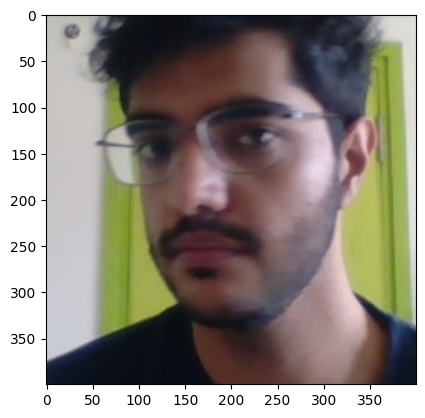

In [ ]:
plt.imshow(img2)

In [ ]:
from mtcnn.mtcnn import MTCNN

In [ ]:
detector = MTCNN()
results = detector.detect_faces(img2)

1/1 [==============================] - 0s 244ms/step


In [ ]:
results

[{'box': [77, 13, 227, 313],
  'confidence': 0.9999744296073914,
  'keypoints': {'left_eye': (120, 133),
   'right_eye': (224, 129),
   'nose': (157, 198),
   'mouth_left': (136, 259),
   'mouth_right': (215, 257)}}]

In [ ]:
x,y,w,h = results[0]['box']

In [ ]:
img2= cv2.rectangle(img2,(x,y),(x+w, y+w),(255,0,0),1)

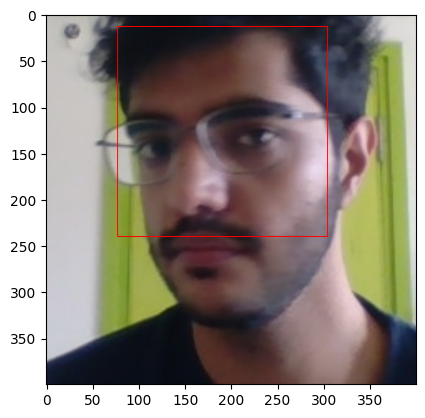

In [ ]:
plt.imshow(img2)

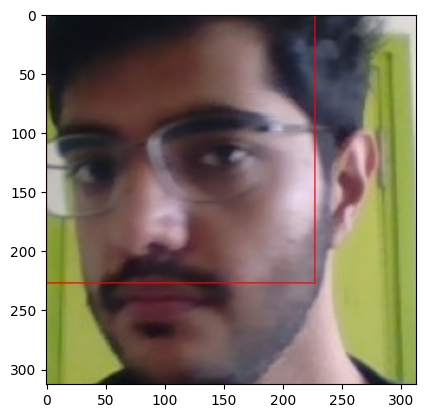

In [ ]:
img_face =img2[y:y+h, x:x+h]
plt.imshow(img_face)

In [ ]:
img_face = cv2.resize(img_face, (160,160))

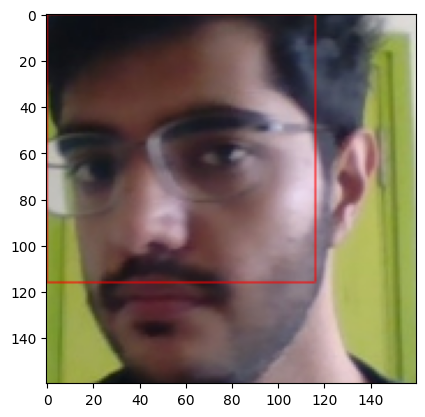

In [ ]:
plt.imshow(img_face)

In [ ]:
# function that will put all images in x array and labels in y array

In [ ]:
#this is made by taking into consideration that each image

In [ ]:
class FaceLoad:
  def __init__(self,directory):
    self.directory = directory
    self.target_size= (160,160)
    self.X = []
    self.Y = []
    self.detector = MTCNN()
  
  def extract_face(self,file):
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    res= self.detector.detect_faces(img)
    x,y,w,h = res[0]['box']
    x,y = abs(x),abs(y)
    face= img[y:y+h , x:x+w]
    face_arr =cv2.resize(face,self.target_size)
    return face_arr

  def load_faces(self,dir):
    FACES=[]
    for im_name in os.listdir(dir):
      path = dir+ im_name
      single_face = self.extract_face(path)
      FACES.append(single_face)
    return FACES
  
  def load_lables(self):
    for sub_dir in os.listdir(self.directory):
      path= self.directory + '/' +sub_dir+'/'
      FACES = self.load_faces(path)
      labels = [sub_dir for _ in range(len(FACES))]
      print(f"loaded successfully : {len(labels)}")
      self.X.extend(FACES)
      self.Y.extend(labels)

    return np.asarray(self.X),np.asarray(self.Y)
  
  def plot_img(self):
    for num, image in enumerate(self.X):
      ##ncols=10
      ##nrows=len(self.Y)
      plt.subplot(10,10,num+1)
      plt.imshow(image)


In [ ]:
faceloading = FaceLoad('/content/drive/MyDrive/Face_recognisation/dataset/train')
X,Y = faceloading.load_lables()

1/1 [==============================] - 0s 192ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 63ms/step
loaded successfully : 14
1/1 [==============================] - 0s 31ms/step
loaded successfully : 19
1/1 [==============================] - 0s 29ms/step
loaded successfully : 17
1/1 [==============================] - 0s 29ms/step
loaded successfully : 21
1/1 [==============================] - 0s 29ms/step
loaded successfully : 22
1/1 [==============================] - 0s 43ms/step
loaded successfully : 42
1/1 [==============================] - 0s 47ms/step
loaded successfully : 5


In [ ]:
# using facenet for training

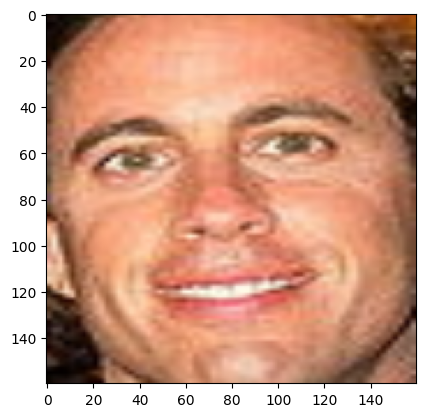

In [ ]:
image1 = X[50]
plt.imshow(image1)

In [ ]:
!pip install keras-facenet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10385 sha256=d1216ba7d85eefcb8f2561ecf1d8b580b89cd5d20fefe4cd13ac7166bbf83153
  Stored in directory: /root/.cache/pip/wheels/1d/d8/a9/85cf04ea29321d2afcb82c0caaafdca9195385f9d68cbc7185
Successfully built keras-facenet


In [ ]:
from keras_facenet import FaceNet
embedder= FaceNet()

In [ ]:
def get_embedding(face_img):
  face_img = face_img.astype('float32') #3d 160x160x3
  # add another dimension because tf requires 4d
  face_img = np.expand_dims(face_img, axis=0)#none x 160 x 160 x 3 

  yhat = embedder.embeddings(face_img)
  return yhat[0] # we will get 512 D array and it will then be compared

In [ ]:
emb_X =[]

for img in X:
  emb_X.append(get_embedding(img))

1/1 [==============================] - 0s 85ms/step


In [ ]:
emb_X = np.asarray(emb_X)

In [ ]:
len(emb_X)

140

In [ ]:
Base_Path = '/content/drive/MyDrive/Face_recognisation'
#for i in range(len(emb_X)):
np.savez_compressed(os.path.join(Base_Path, 'face_embed.npz'), emb_X,Y)


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(Y)
Y= encoder.transform(Y)

SVM

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test = train_test_split(emb_X, Y, shuffle =True, random_state=42)

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear', probability = True)

In [ ]:
model.fit(X_train, Y_train)

SVC(kernel='linear', probability=True)

In [ ]:
y_preds = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(Y_test,y_preds)

1.0

In [ ]:
tes_im = cv2.imread('/content/drive/MyDrive/Face_recognisation/dataset/WIN_20230427_22_37_15_Pro.jpg')
tes_im = cv2.cvtColor(tes_im,cv2.COLOR_BGR2RGB)

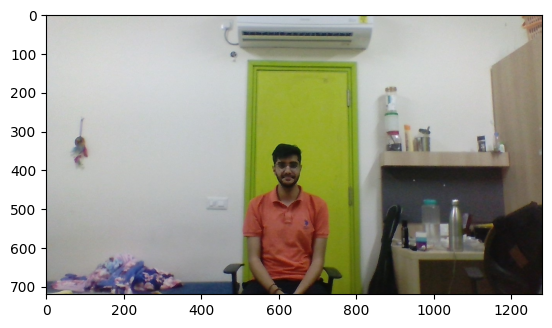

In [ ]:
plt.imshow(tes_im)

In [ ]:
x,y,w,h = detector.detect_faces(tes_im)[0]['box']

1/1 [==============================] - 0s 59ms/step


In [ ]:
tes_im = tes_im[y:y+h, x:x+w]
tes=im = cv2.resize(tes_im, (160,160))
tes_im= get_embedding(tes_im)

1/1 [==============================] - 0s 165ms/step


In [ ]:
tes_im = [tes_im] #converting to 2d array


In [ ]:
def recog_face(img):
  tes_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  
  res = detector.detect_faces(tes_img)

  #remove non face data (FP)
  res_final=[]
  for i in range(len(res)):
    a= res[i]['confidence']
    if a > 0.90:
      res_final.append(res[i])

      # for image with multiple faces
  for l in range(len(res_final)):
    tes_im = tes_img
    x,y,w,h = res_final[l]['box']
    tes_im = tes_im[y:y+h, x:x+w]
    tes_im = cv2.resize(tes_im, (160,160))
    plt.imshow(tes_im)
    tes_im= get_embedding(tes_im)
    tes_im = [tes_im] #converting to 2d array
    ypreds = model.predict(tes_im)
    confi = model.decision_function(tes_im)
    max_confi = np.max(confi[0])
    if max_confi > 6.22:
      out = encoder.inverse_transform(ypreds)
      out= str(out)
      print('\n')
      print(out)
      print('\n')
      print(confi)
    else:
      print('Match not found error')
      print('probably image not fed to model')


In [ ]:
def convImgforModel(img):
  tes_im = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  x,y,w,h = detector.detect_faces(tes_im)[0]['box']
  tes_im = tes_im[y:y+h, x:x+w]
  tes_im = cv2.resize(tes_im, (160,160))
  plt.imshow(tes_im)
  tes_im= get_embedding(tes_im)
  tes_im = [tes_im] #converting to 2d array
  return tes_im


In [ ]:
ypreds = model.predict(tes_im)


In [ ]:
ypreds

array([0])

In [ ]:
int_val = int(ypreds[0])

In [ ]:
int_val

0

In [ ]:
out =encoder.inverse_transform(ypreds)

In [ ]:
out= str(out)

In [ ]:
out

"['Raghav_Chauhan']"

In [ ]:
test2_img = cv2.imread('/content/ab_gp_0_eo_18.JPG')


In [ ]:
tes_im = cv2.cvtColor(test2_img,cv2.COLOR_BGR2RGB)
res =detector.detect_faces(tes_im)

1/1 [==============================] - 0s 93ms/step


In [ ]:
res

[{'box': [1905, 1600, 35, 43],
  'confidence': 0.9999998211860657,
  'keypoints': {'left_eye': (1916, 1618),
   'right_eye': (1932, 1618),
   'nose': (1925, 1625),
   'mouth_left': (1919, 1635),
   'mouth_right': (1931, 1634)}},
 {'box': [1713, 1634, 34, 43],
  'confidence': 0.9999967217445374,
  'keypoints': {'left_eye': (1723, 1650),
   'right_eye': (1740, 1651),
   'nose': (1731, 1660),
   'mouth_left': (1724, 1668),
   'mouth_right': (1736, 1669)}},
 {'box': [1136, 653, 38, 48],
  'confidence': 0.7429682612419128,
  'keypoints': {'left_eye': (1153, 671),
   'right_eye': (1166, 667),
   'nose': (1167, 677),
   'mouth_left': (1158, 689),
   'mouth_right': (1169, 686)}}]

In [ ]:
res_final=[]
for i in range(len(res)):
  a= res[i]['confidence']
  if a > 0.90:
    res_final.append(res[i])


In [ ]:
res_final

[{'box': [1905, 1600, 35, 43],
  'confidence': 0.9999998211860657,
  'keypoints': {'left_eye': (1916, 1618),
   'right_eye': (1932, 1618),
   'nose': (1925, 1625),
   'mouth_left': (1919, 1635),
   'mouth_right': (1931, 1634)}},
 {'box': [1713, 1634, 34, 43],
  'confidence': 0.9999967217445374,
  'keypoints': {'left_eye': (1723, 1650),
   'right_eye': (1740, 1651),
   'nose': (1731, 1660),
   'mouth_left': (1724, 1668),
   'mouth_right': (1736, 1669)}}]

In [ ]:
images=[]
for l in range(len(res_final)):
  x,y,w,h = res_final[l]['box']
  tes_im_rec = cv2.rectangle(tes_im, (x,y), (x+w, y+h), (225,0,0), 2)
  finIm = tes_im_rec[y:y+h, x:x+w]
  finIm = cv2.resize(finIm, (160,160)) 
  images.append(finIm)


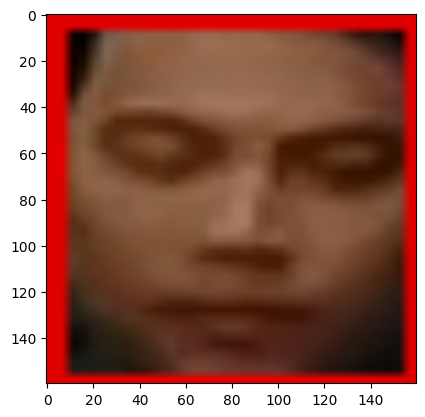

In [ ]:
plt.imshow(images[1])

1/1 [==============================] - 0s 97ms/step
['Raghav_Chauhan']
[[ 6.26539957  5.24391801  4.20700798  0.75185986  3.08924765  2.02784731
  -0.28443937]]


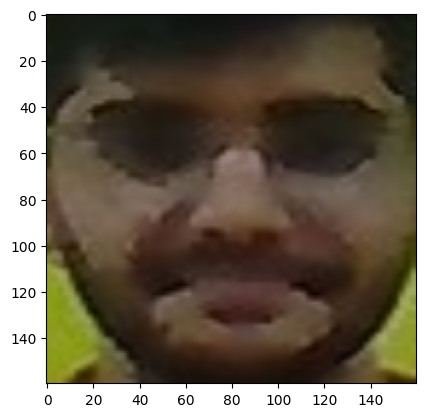

In [ ]:
rag =cv2.imread('/content/drive/MyDrive/Face_recognisation/dataset/WIN_20230427_22_37_15_Pro.jpg')
recog_face(rag)

In [ ]:
import pickle

In [ ]:

#for i in range(len(emb_X)):
#pickle.dump(model, open('svm_model_face_rec.pkl', 'wb'))

In [ ]:
#from google.colab import files

In [ ]:
#files.download('svm_model_face_rec.pkl')

In [ ]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 6, 6, 6, 6, 6])

In [ ]:
yt = encoder.inverse_transform(Y)

In [ ]:
yt

array(['ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek',
       'ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek',
       'ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek',
       'ben_afflek', 'ben_afflek', 'madonna', 'madonna', 'madonna',
       'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna',
       'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna',
       'madonna', 'madonna', 'madonna', 'madonna', 'elton_john',
       'elton_john', 'elton_john', 'elton_john', 'elton_john',
       'elton_john', 'elton_john', 'elton_john', 'elton_john',
       'elton_john', 'elton_john', 'elton_john', 'elton_john',
       'elton_john', 'elton_john', 'elton_john', 'elton_john',
       'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld',
       'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld',
       'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld',
       'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld',
       'jerry_seinfeld', 'jerry_sein

Final Test of Model

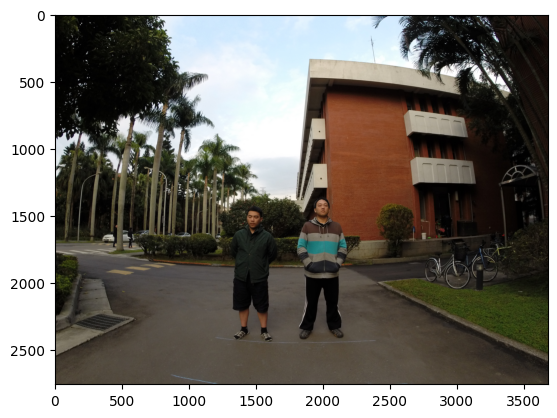

In [ ]:
#First image with closest distance

img1_close = cv2.imread('/content/ab_gp_0_eo_28.JPG')
change_color = cv2.cvtColor(img1_close, cv2.COLOR_BGR2RGB)
plt.imshow(change_color)

1/1 [==============================] - 0s 101ms/step
['sub_1']
[[ 0.76055958  1.80171208  4.1778881  -0.24913593  5.20664543  2.80627249
   6.28274826]]
1/1 [==============================] - 0s 93ms/step
Match not found error

 probably image not fed to model


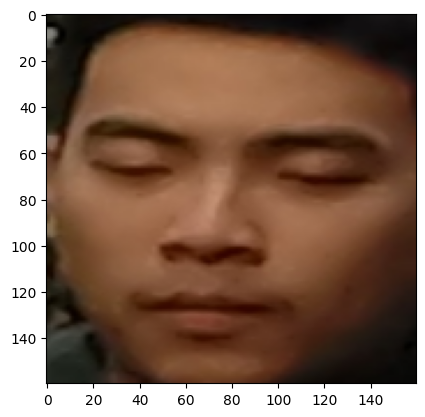

In [ ]:
recog_face(img1_close)

In [ ]:
# 2nd image a bit far

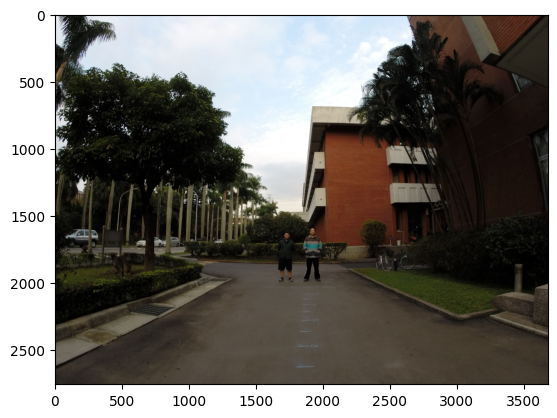

In [ ]:
img2_middle = cv2.imread('/content/ab_gp_0_eo_18.JPG')
change_color = cv2.cvtColor(img2_middle, cv2.COLOR_BGR2RGB)
plt.imshow(change_color)

1/1 [==============================] - 0s 90ms/step


['sub_1']


1/1 [==============================] - 0s 170ms/step
Match not found error
probably image not fed to model


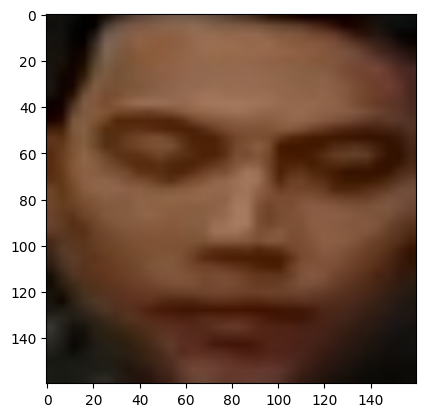

In [ ]:
recog_face(img2_middle)

In [ ]:
#far image

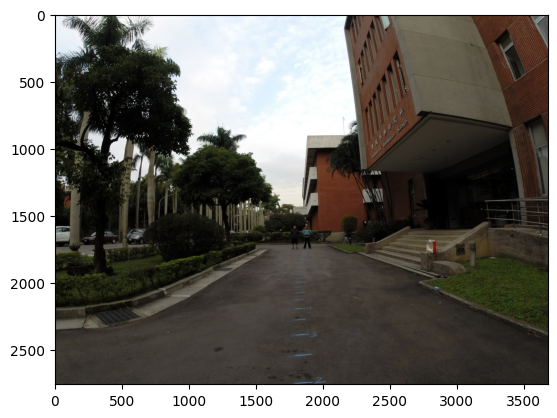

In [ ]:
img3_far = cv2.imread('/content/ab_gp_0_eo_00.JPG')
change_color = cv2.cvtColor(img3_far, cv2.COLOR_BGR2RGB)
plt.imshow(change_color)

1/1 [==============================] - 0s 149ms/step


['mindy_kaling']


[[-0.23248046  3.0590114   4.15421122  0.78267004  2.02408508  6.23020965
   5.14735588]]
1/1 [==============================] - 0s 155ms/step
Match not found error
probably image not fed to model


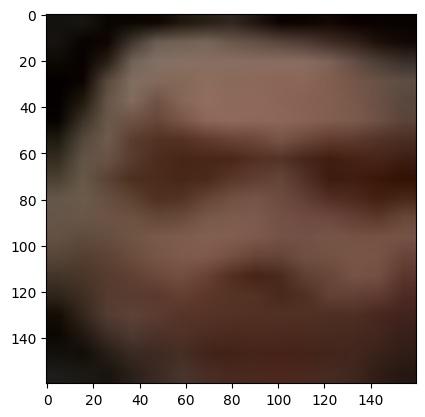

In [ ]:
recog_face(img3_far)

In [ ]:
#From the farthest distance it is showing wrong output.. that is due to lack of dataset

In [ ]:
# From certain height

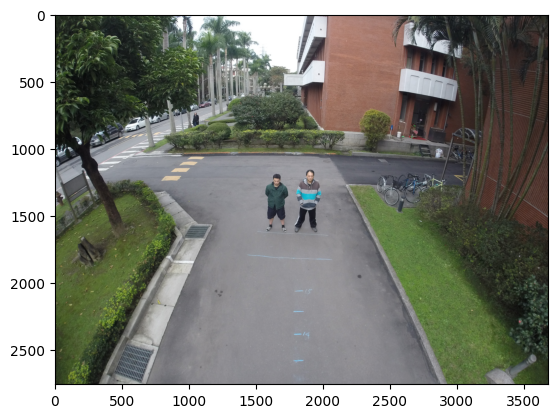

In [ ]:
img4_height = cv2.imread('/content/ab_gp_4_eo_25.JPG')
change_color = cv2.cvtColor(img4_height, cv2.COLOR_BGR2RGB)
plt.imshow(change_color)

1/1 [==============================] - 0s 97ms/step


['sub_1']


[[-0.26456647  1.79652953  4.19575438  0.77021212  5.22291779  2.77834635
   6.28688402]]
1/1 [==============================] - 0s 94ms/step


['elton_john']


[[ 1.90942669  1.87089924  6.23903604  4.00782722  1.93177972 -0.21693502
   5.1206552 ]]


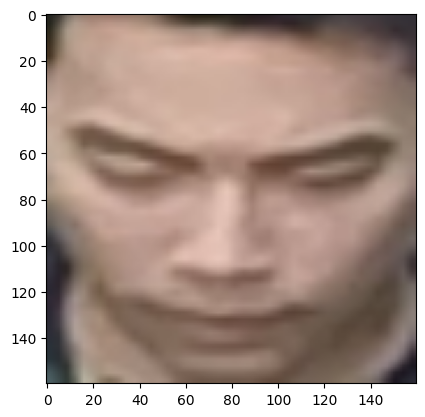

In [ ]:
recog_face(img4_height)

In [ ]:
# lack of dataset